In [19]:
### importar librerias estandar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import sys 
### importar librerias locales
sys.path.append('../src')
from plot_roc_curve import plot_roc_curve

### Cargar Data de Testeo

In [20]:
### cargar data de testeo
df_test = pd.read_csv('../data/test.csv')
df_test['Cliente_Marca_Cupo'] = df_test['Cliente'].astype('str')+df_test['Marca'].astype('str')+df_test['Cupo'].astype('str')
df_test.set_index('Cliente_Marca_Cupo', inplace=True)
df_test.head()

,Cliente,Marca,Cupo,Ejecuto_Promo
Cliente_Marca_Cupo,,,,
104016,10,40,16,NaN
17299,17,29,9,NaN
37299,37,29,9,NaN
46299,46,29,9,NaN
48299,48,29,9,NaN


## Construcción del Target

In [21]:
### cargar data intermedia que contiene todos los campos 4 bases anteriores
df_intermediate = pd.read_pickle('../data/df_feature_engineering_v3.pkl')

In [22]:
### var datos estadistico 
df_intermediate['NroPromocionesRatio'].describe()

count    34551.000000
mean         0.040946
std          0.093638
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: NroPromocionesRatio, dtype: float64

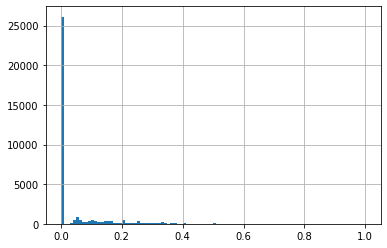

In [23]:
df_intermediate['NroPromocionesRatio'].hist(bins = 100);

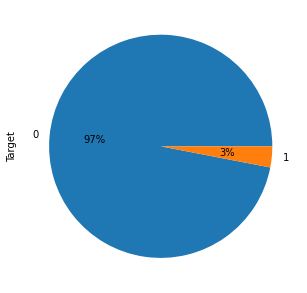

In [24]:
### construir la variable Target, tamando en cuenta el NroPromocionesRatio donde mayores a 0.3 seran los valores de 1 y 0 caso contrario
df_intermediate['Target'] = df_intermediate['NroPromocionesRatio'].apply(lambda x: 1 if x > 0.3 else 0) 
df_intermediate['Target'].value_counts().plot(kind='pie', autopct = "%1.0f%%", figsize=(5, 10));

## Entrenamiento

In [25]:
# delete variables
var_delete = ['CodigoDC', 'Is_Executed', 'Fecha_Desde', 'Fecha_Hasta', 'Duracion_Promocion', 'FechaAltaCliente', 'Nr', 'Hl', 'Dcto', 'Año', 'Mes', 'ClaseEnvase', 'SegmentoPrecio', 'ListMarca', 'ListCupo']
df_intermediate.drop(var_delete, axis=1, inplace=True)

In [26]:
var_categ = [
 'Marca', 'Cupo', 'Region', 'Gerencia', 'SubCanal', 'Estrato',
 'Cliente', 'TipoPoblacion', 'EF', 'Mes_Moda', 'ClaseEnvase_Moda', 'SegmentoPrecio_Moda', 'Marca_Moda', 'Cupo_Moda', 'mes_1', 'mes_2', 'mes_3',
 'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12', 'ClaseEnvases_1', 
 'ClaseEnvases_2','SegmentoPrecio_1', 'SegmentoPrecio_2', 'SegmentoPrecio_3', 'SegmentoPrecio_4',
#  'Gerencia_0', 'Gerencia_1', 'Gerencia_2', 'Gerencia_3', 'Gerencia_4', 'Gerencia_5', 'Gerencia_6', 'SubCanal_0',
#  'SubCanal_1', 'SubCanal_2', 'SubCanal_3', 'SubCanal_4', 'SubCanal_5',
#  'Marca_29', 'Marca_39', 'Marca_40', 'Cupo_9', 'Cupo_16', 'Cupo_20',
#  'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Estrato_1',
#  'Estrato_2', 'Estrato_3', 'Estrato_4', 'Estrato_5', 'Estrato_6'
]

In [28]:
var_cuanti = [
  'Cliente_Sales',
  'NroPromociones',
  'Duracion_Promocion_Max',
  'Duracion_Promocion_Mean',
  'Nr_Total',
  'Nr_Promedio', 
  'Nr_Std',
  'Nro_Compra',
  'Hl_Total',
  'Hl_Promedio',
  'Dcto_Total',
  'Dcto_Promedio',
  'Marca_Freq_40', 
  'Marca_Freq_39', 
  'Marca_Freq_29',
  'Cupo_Freq_16',
  'Cupo_Freq_20',
  'Cupo_Freq_9',
  'Annios_Desde_FechaAltaCliente',
  'Meses_Desde_FechaAltaCliente',
  'Dias_Desde_FechaAltaCliente'
]
 ### quitando  #NroPromocionesConsumidas #NroPromocionesRatio

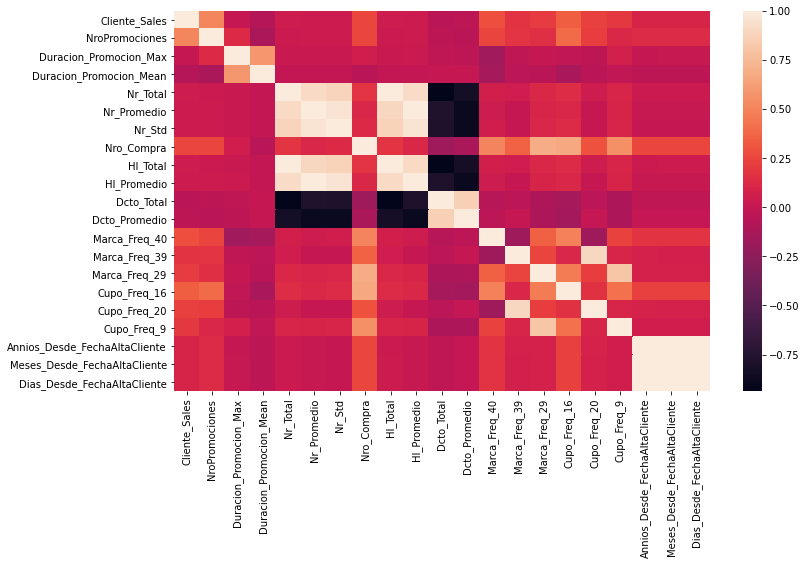

In [29]:
### visualizar la correlacion entre las variables cuantitativas
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 7))
sns.heatmap(df_intermediate[var_cuanti].corr());

In [30]:
var_total = var_cuanti + var_categ
var_total

['Cliente_Sales',
 'NroPromociones',
 'Duracion_Promocion_Max',
 'Duracion_Promocion_Mean',
 'Nr_Total',
 'Nr_Promedio',
 'Nr_Std',
 'Nro_Compra',
 'Hl_Total',
 'Hl_Promedio',
 'Dcto_Total',
 'Dcto_Promedio',
 'Marca_Freq_40',
 'Marca_Freq_39',
 'Marca_Freq_29',
 'Cupo_Freq_16',
 'Cupo_Freq_20',
 'Cupo_Freq_9',
 'Annios_Desde_FechaAltaCliente',
 'Meses_Desde_FechaAltaCliente',
 'Dias_Desde_FechaAltaCliente',
 'Marca',
 'Cupo',
 'Region',
 'Gerencia',
 'SubCanal',
 'Estrato',
 'Cliente',
 'TipoPoblacion',
 'EF',
 'Mes_Moda',
 'ClaseEnvase_Moda',
 'SegmentoPrecio_Moda',
 'Marca_Moda',
 'Cupo_Moda',
 'mes_1',
 'mes_2',
 'mes_3',
 'mes_4',
 'mes_5',
 'mes_6',
 'mes_7',
 'mes_8',
 'mes_9',
 'mes_10',
 'mes_11',
 'mes_12',
 'ClaseEnvases_1',
 'ClaseEnvases_2',
 'SegmentoPrecio_1',
 'SegmentoPrecio_2',
 'SegmentoPrecio_3',
 'SegmentoPrecio_4']

In [31]:
### division de la data
x = df_intermediate[var_total].copy()
y = df_intermediate['Target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42, stratify = y )
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27640, 53), (6911, 53), (27640,), (6911,))

In [32]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label = y_train)
### definir los parámetros del modelo
param = {'num_leaves':50,'objective':'binary','max_depth':9,'learning_rate':0.01,'max_bin':200} ## 100 ###6, ##200
param['metric'] =['auc','binary_logloss']
num_round=500 ##1000
### entrenar el modelo Ligh GBM
clf=lgb.train(param,train_data,num_round)

In [33]:
from sklearn.metrics import roc_auc_score
pred = clf.predict(x_test)
roc_auc_score(y_test, pred)

0.9584027970238984

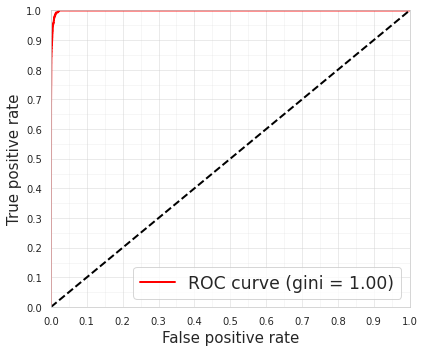

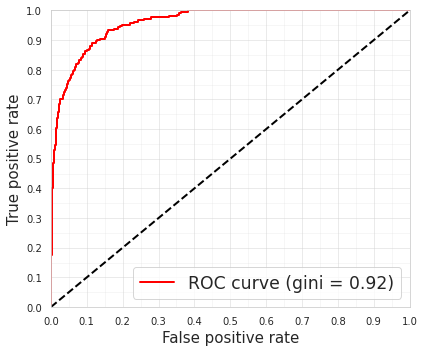

In [34]:
##ROC en el train
pred_train=clf.predict(x_train)
plot_roc_curve(y_train,pred_train,width=6,height=5)
##ROC en el test
pred_test=clf.predict(x_test)
plot_roc_curve(y_test,pred_test,width=6,height=5)

In [35]:
from sklearn.metrics import classification_report
pred[pred>=0.5] = 1
pred[pred<0.5] = 0
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6701
           1       0.74      0.32      0.45       210

    accuracy                           0.98      6911
   macro avg       0.86      0.66      0.72      6911
weighted avg       0.97      0.98      0.97      6911



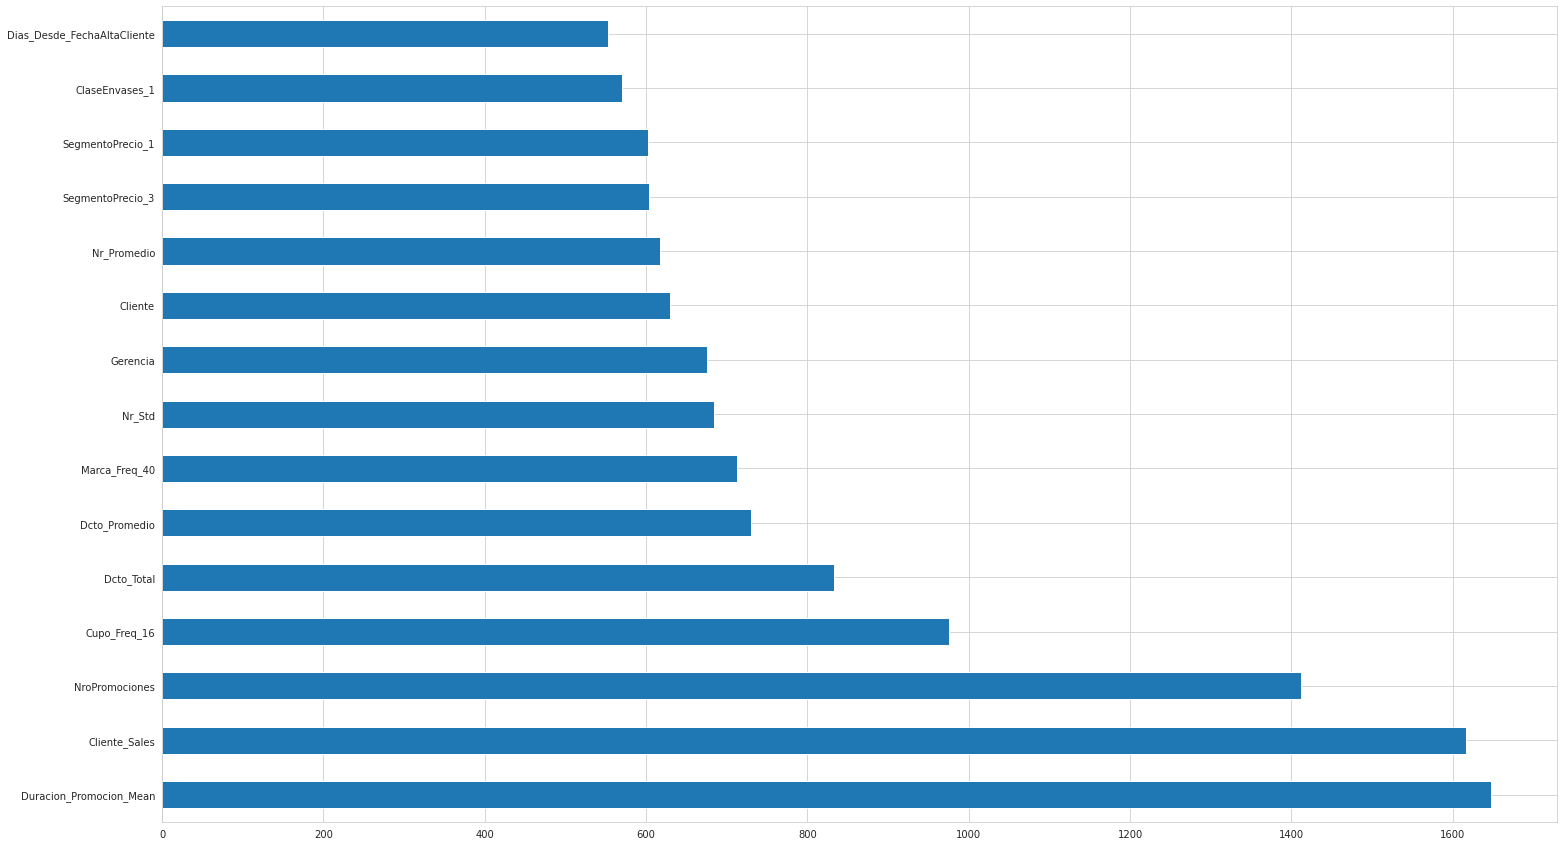

In [37]:
### visualizar la 15 variables mas importantes encontradas por el modelo Light GBM
feat_importances = pd.Series(clf.feature_importance(), index=x.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(25, 15));

## Guardar los resultados

In [38]:
pred_ = clf.predict(x.loc[df_test.index])
df_test['Ejecuto_Promo'] = pred_
df_test

,Cliente,Marca,Cupo,Ejecuto_Promo
Cliente_Marca_Cupo,,,,
104016,10,40,16,0.002223
17299,17,29,9,0.006888
37299,37,29,9,0.000907
46299,46,29,9,0.050023
48299,48,29,9,0.001418
...,...,...,...,...
150534016,15053,40,16,0.044479
150544016,15054,40,16,0.037879
150564016,15056,40,16,0.068042


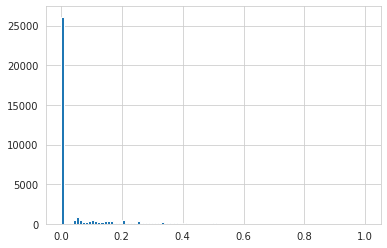

In [41]:
df_intermediate['NroPromocionesRatio'].hist(bins=100);

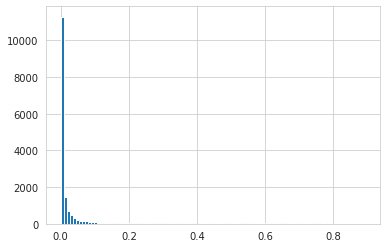

In [42]:
df_test['Ejecuto_Promo'].hist(bins=100);

In [43]:
df_test.to_csv('../results/df_pred_resultado_final.csv', sep=',', encoding='utf 8', index = False)